In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
# 데이터 처리
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 검정
from scipy.stats import ttest_ind

In [2]:
import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/smoking_driking_dataset.csv"
df = pd.read_csv(path)

df.head()


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [4]:
df.describe()


,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [11]:
# 성별: Male=1, Female=0 으로 변환
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

In [21]:
df = pd.read_csv(path)

# 다시 인코딩
df['DRK_YN'] = df['DRK_YN'].map({'Y': 1, 'N': 0})

In [10]:
# 흡연 상태 값 분포 확인
# (1: 비흡연, 2: 과거흡연, 3: 현재흡연인지 확인 목적)
df['SMK_stat_type_cd'].value_counts()


,count
SMK_stat_type_cd,
1.0,602441
3.0,213954
2.0,174951


In [13]:
# 흡연 상태(SMK_stat_type_cd)에 따라
# 주요 건강 지표들의 평균을 계산
smoking_mean = df.groupby('SMK_stat_type_cd')[[
    'SBP',            # 수축기 혈압
    'DBP',            # 이완기 혈압
    'BLDS',           # 공복 혈당
    'HDL_chole',      # 좋은 콜레스테롤
    'LDL_chole',      # 나쁜 콜레스테롤
    'triglyceride',   # 중성지방
    'SGOT_AST',       # 간 수치(AST)
    'SGOT_ALT',       # 간 수치(ALT)
    'gamma_GTP'       # 간 수치(음주·흡연 민감)
]].mean()

smoking_mean


,SBP,DBP,BLDS,HDL_chole,LDL_chole,triglyceride,SGOT_AST,SGOT_ALT,gamma_GTP
SMK_stat_type_cd,,,,,,,,,
1.0,121.177911,74.916407,98.471651,59.258090,113.364130,115.055730,24.680925,22.813524,27.426485
2.0,125.345011,78.059588,104.173711,53.824900,112.836686,147.418752,28.196804,29.959320,47.043515
3.0,123.583527,77.610842,102.857245,52.945241,112.282888,167.759654,27.868313,30.599811,56.375763


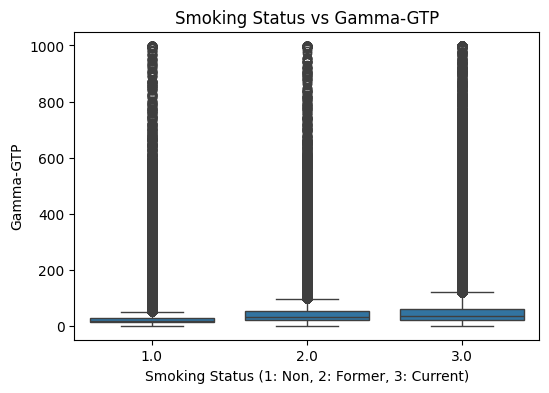

In [16]:
# 흡연 상태별 gamma-GTP 분포를 boxplot으로 시각화
# 이상치(outlier)와 중앙값 차이를 한눈에 확인 가능
plt.figure(figsize=(6,4))
sns.boxplot(x='SMK_stat_type_cd', y='gamma_GTP', data=df)

plt.xlabel('Smoking Status (1: Non, 2: Former, 3: Current)')
plt.ylabel('Gamma-GTP')
plt.title('Smoking Status vs Gamma-GTP')

plt.show()


In [24]:
# 음주 여부에 따른 주요 지표 평균 비교
drinking_mean = df.groupby('DRK_YN')[[
    'gamma_GTP',      # 음주에 민감한 간 수치
    'SGOT_AST',
    'SGOT_ALT',
    'triglyceride',
    'SBP',
    'BLDS'
]].mean()

drinking_mean


,gamma_GTP,SGOT_AST,SGOT_ALT,triglyceride,SBP,BLDS
DRK_YN,,,,,,
0,26.798521,25.064444,24.100658,121.476582,121.950591,100.068826
1,47.481893,26.914864,27.410680,142.814884,122.914765,100.780334


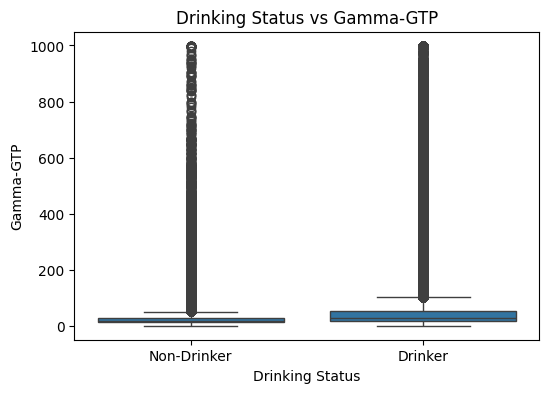

In [30]:
# 음주 여부에 따른 gamma-GTP 분포 비교
plt.figure(figsize=(6,4))
sns.boxplot(x='DRK_YN', y='gamma_GTP', data=df)

plt.xticks([0, 1], ['Non-Drinker', 'Drinker'])
plt.xlabel('Drinking Status')
plt.ylabel('Gamma-GTP')
plt.title('Drinking Status vs Gamma-GTP')

plt.show()


In [26]:
# 흡연 상태 + 음주 여부를 결합한 그룹 생성
# 예: 3_1 → 현재흡연 + 음주
df['smk_drk_group'] = (
    df['SMK_stat_type_cd'].astype(int).astype(str) + "_" +
    df['DRK_YN'].astype(int).astype(str)
)

# 조합별 표본 수 확인
df['smk_drk_group'].value_counts()


,count
smk_drk_group,
1_0,389010
1_1,213431
3_1,161577
2_1,120480
2_0,54471
3_0,52377


In [27]:
# 흡연·음주 조합별 평균 건강 지표 비교
df.groupby('smk_drk_group')[[
    'gamma_GTP',
    'triglyceride',
    'SBP'
]].mean().sort_values('gamma_GTP', ascending=False)


,gamma_GTP,triglyceride,SBP
smk_drk_group,,,
3_1,63.065517,173.741820,124.316679
2_1,53.051411,152.724834,125.771921
3_0,35.738645,149.305363,121.321840
2_0,33.755136,135.682657,124.400764
1_1,32.540432,113.807699,120.240612
1_0,24.620709,115.740464,121.692162


In [28]:
# 음주 여부에 따른 gamma-GTP 차이가
# 통계적으로 유의미한지 확인 (Welch t-test)

drink = df[df['DRK_YN'] == 1]['gamma_GTP']
nodrink = df[df['DRK_YN'] == 0]['gamma_GTP']

t_stat, p_value = ttest_ind(drink, nodrink, equal_var=False)

t_stat, p_value


(np.float64(208.59148241682635), np.float64(0.0))

In [ ]:
# 상관관계가 높은 컬럼 찾기

In [31]:
# 분석 대상 컬럼 목록
health_cols = [
    'SBP', 'DBP', 'BLDS',
    'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride',
    'hemoglobin',
    'serum_creatinine',
    'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'
]

# 음주, 흡연 컬럼 포함
analysis_cols = ['DRK_YN', 'SMK_stat_type_cd'] + health_cols

df_corr = df[analysis_cols]


In [32]:
# 음주 여부와 각 건강 지표 간 상관계수 계산
drk_corr = df_corr.corr()['DRK_YN'].drop('DRK_YN')

# 절댓값 기준으로 정렬 (연관성 크기 순)
drk_corr_sorted = drk_corr.abs().sort_values(ascending=False)

drk_corr_sorted


,DRK_YN
SMK_stat_type_cd,0.350784
hemoglobin,0.299341
gamma_GTP,0.205094
triglyceride,0.104398
DBP,0.100876
SGOT_ALT,0.062908
serum_creatinine,0.060798
LDL_chole,0.043693
HDL_chole,0.042514
SGOT_AST,0.039382


In [33]:
# 흡연 상태와 각 건강 지표 간 상관계수 계산
smk_corr = df_corr.corr()['SMK_stat_type_cd'].drop('SMK_stat_type_cd')

# 절댓값 기준 정렬
smk_corr_sorted = smk_corr.abs().sort_values(ascending=False)

smk_corr_sorted


,SMK_stat_type_cd
hemoglobin,0.453385
DRK_YN,0.350784
gamma_GTP,0.243576
triglyceride,0.216026
HDL_chole,0.161031
SGOT_ALT,0.131569
serum_creatinine,0.129679
DBP,0.126849
BLDS,0.086490
SBP,0.084918
